<a href="https://colab.research.google.com/github/naveen312/DS-BY-NAVEEN/blob/main/ASSIGNMENT_SIMPLE_LINEAR_REGRESSION(SALARY_DATA)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Salary using YearsExperience

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
print("Libraries Imported!")

Libraries Imported!


In [22]:
# loading the csv data into dataframe and previeing the first five rows
df_salary=pd.read_csv("/content/Salary_Data (1).csv")
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
# Checking the no of rows and column
df_salary.shape

(30, 2)

In [24]:
# Checking for missing data
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [25]:
# checking the statistics of given data
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Checking for normal distribution and outlier detection using Histogram and boxplot
Since both salary and experience columns are continuous, we will use histogram and boxplot for checking normal distribution and outlier detection

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


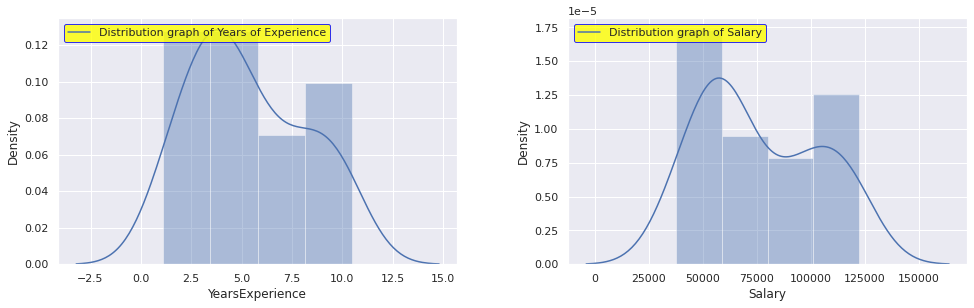

In [26]:
# Visualizing the distribution 
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot
plt.subplot(2,2,1)
ax = sns.distplot(df_salary['YearsExperience'])
plt.legend(["Distribution graph of Years of Experience"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second plot-distanc
plt.subplot(2,2,2)
ax = sns.distplot(df_salary['Salary'])
plt.legend(["Distribution graph of Salary"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.tight_layout(5) 
plt.show()

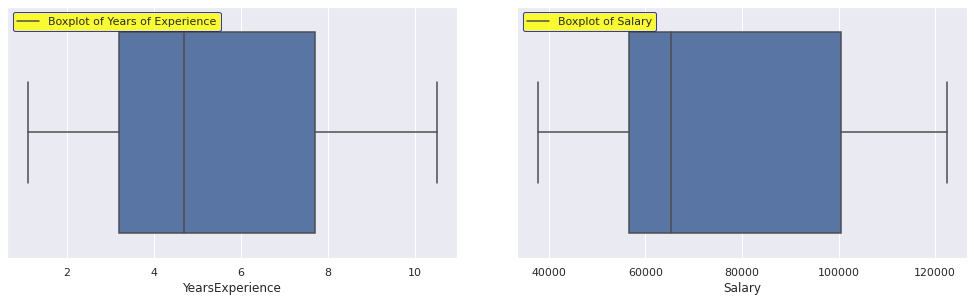

In [27]:
# BOXPLOTS
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot
plt.subplot(2,2,1)
ax = sns.boxplot(x=df_salary['YearsExperience'])
plt.legend(['Boxplot of Years of Experience'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second 
plt.subplot(2,2,2)
ax = sns.boxplot(x=df_salary['Salary'])
plt.legend(["Boxplot of Salary"],loc='upper left',facecolor='yellow',edgecolor='blue')

plt.tight_layout(5) 
plt.show()

No outliers present in YearsExperience and Salary data

# Checking for correlation between input and output variable using scatter plot and correlation matrix

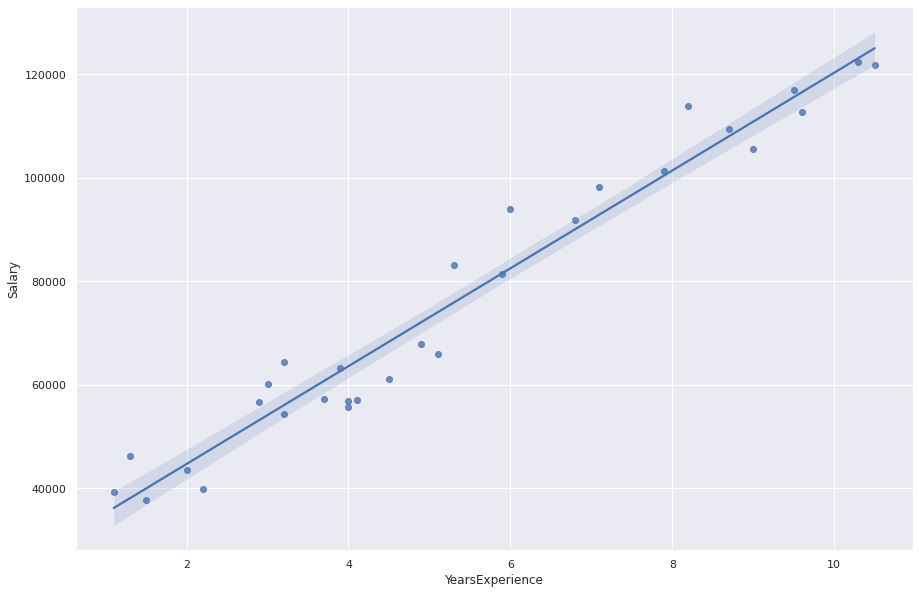

In [28]:
sns.regplot(x="YearsExperience", y="Salary", data=df_salary)

In [29]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


There is high positive correlation(0.978) between Salary and Years of Experience

# Model 1- Using raw data only without standardization and transformation

In [30]:
model_1 = smf.ols("Salary~YearsExperience",data = df_salary).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        16:26:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Calculating RMSE for model 1
!pip install ml_metrics
from ml_metrics import mse
pred_1=model_1.predict(df_salary['YearsExperience'])
rmse_1=np.sqrt(mse(df_salary['Salary'],pred_1))
print("RMSE for first model is:",rmse_1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
RMSE for first model is: 5592.043608760662


## Model 2- Using standardization on x and y

In [32]:
# Converting the dataframe to an array and then using standardscaler() to standardize the values
from sklearn.preprocessing import StandardScaler
array_salary=df_salary.values
standard_salary= StandardScaler().fit(array_salary).transform(array_salary)
standard_salary[0:5]

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143]])

In [33]:
# separating the array into X and Y before fitting using OLS
X=standard_salary[:,0]
Y=standard_salary[:,1]
model_2 = sm.OLS(Y,X).fit() 
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              644.7
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    2.33e-21
Time:                        16:26:34   Log-Likelihood:                          4.6151
No. Observations:                  30   AIC:                                     -7.230
Df Residuals:                      29   BIC:                                     -5.829
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9782      0.039     25.392      0.000       0.899       1.057
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Calculating RMSE for model 2
pred_2=model_2.predict(X)
rmse_2=np.sqrt(mse(Y,pred_2))
print("RMSE for second model is:",rmse_2)

RMSE for second model is: 0.2074688792481693


# Model 3- Using Normalization on X and Y

In [35]:
# Using MinMaxScaler to get normalized values of dataframe
from sklearn.preprocessing import MinMaxScaler
array_salary=df_salary.values
norm_salary= MinMaxScaler().fit(array_salary).transform(array_salary)
norm_salary[0:5]

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382]])

In [36]:
# Splitting ino X and Y 
X=norm_salary[:,0]
Y=norm_salary[:,1]
model_3=sm.OLS(Y,X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1957.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                    3.58e-28
Time:                        16:26:34   Log-Likelihood:                          38.606
No. Observations:                  30   AIC:                                     -75.21
Df Residuals:                      29   BIC:                                     -73.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0210      0.023     44.238      0.000       0.974       1.068
==============================================================================
Omnibus:                        1.478   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.229
Skew:                           0.310   Prob(JB):                        0.541
Kurtosis:                       2.226   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Calculating RMSE for model 3
pred_3=model_3.predict(X)
rmse_3=np.sqrt(mse(Y,pred_3))
print("RMSE for third model is:",rmse_3)

RMSE for third model is: 0.06681594717770253


# Model 4 - Using transformation on x

In [38]:
df2=df_salary.copy()
df2['log_Experience']=np.log(df2['YearsExperience'])
df2['log_Salary']=np.log(df2['Salary'])
df2.head()

,YearsExperience,Salary,log_Experience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


In [39]:
#Checking correlation between transformed X and Y
df2['Salary'].corr(df2['log_Experience'])

0.924061081788264

In [40]:
model_4 = smf.ols("Salary~log_Experience",data = df2).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        16:26:34   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_Experience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Calculating RMSE for model 4
pred_4=model_4.predict(df2['log_Experience'])
rmse_4=np.sqrt(mse(df2['Salary'],pred_4))
print("RMSE for fourth model is:",rmse_4)

RMSE for fourth model is: 10302.893706228302


# Model 5- Transformation on Y 

In [42]:
# Checking correlation between X and transformed Y
df2['YearsExperience'].corr(df2['log_Salary'])

0.9653844412504377

In [43]:
model_5 = smf.ols("log_Salary~YearsExperience",data = df2).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        16:26:34   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model_5.rsquared

0.9319671194084196

In [45]:
# Calculating RMSE for model 5
pred_5=model_5.predict(df2['YearsExperience'])
rmse_5=np.sqrt(mse(df2['log_Salary'],pred_5))
print("RMSE for fourth model is:",rmse_5)

RMSE for fourth model is: 0.09457436847280705


In [46]:
#creating dataframe of results of all models
result_df=pd.DataFrame({'Models':['Raw data','Standardization','Normalization','Transformation on X','Transformation on Y'],
                        'R values':[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,model_5.rsquared],
                        'RMSE':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_5]})
result_df

,Models,R values,RMSE
0,Raw data,0.956957,5592.043609
1,Standardization,0.956957,0.207469
2,Normalization,0.985398,0.066816
3,Transformation on X,0.853889,10302.893706
4,Transformation on Y,0.931967,0.094574


### The best model is the one with Normalization having R value of 0.985 and RMSE of 0.067